---
title: "R-squared"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

R-squared is one possible measure used to describe of how well a model fits the data. It is defined as the proportion of the variance in the dependent variable that is predictable from the independent variables. In the chapter [partitioning of the sum of squares](/regression/partitioning.html) we saw the following equations:

\begin{align*}
SS_\text{Total} &= SS_\text{Model} + SS_\text{Error} \\
\underbrace{\sum_{i=1}^{n} (y_i - \bar{y})^2}_{SS_\text{Total}} &= \underbrace{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}_{SS_\text{Model}} + \underbrace{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}_{SS_\text{Error}},
\end{align*}

where:

- $y_i$ are the observed values,
- $\hat{y}_i$ are the predicted values from the regression model,
- $\bar{y}$ is the mean of the observed values,
- $n$ is the number of observations.

The $R^2$ is defined as

$$
R^2 = \frac{SS_\text{Model}}{SS_\text{Total}} = 1 - \frac{SS_\text{Error}}{SS_\text{Total}}.
$$

When talking about $R^2$, we usually say that it is the proportion of the variance in the observed values that is explained by the model. For example, if $R^2 = 0.8$, we say that the model explains 80% of the variance in the observed values. We will justify this statement in a moment.

The $R^2$ value usually (but not always, see below) ranges from 0 to 1.
It is zero when the model is simply a horizontal line at the mean of the observed values, because $SS_\text{Model}$ can only be zero if $\hat{y}_i = \bar{y}$ for all $i$, which happens when the model is just a horizontal line at $\bar{y}$.
The $R^2$ value is one when the model **perfectly** fits the data, because $SS_\text{Error}$ can only be zero if $\hat{y}_i = y_i$ for all $i$, which happens when the model passes exactly on top of every data point.

In short, the higher the $R^2$ value, the better the model fits the data. [That's not the whole story, you might be interested in reading about overfitting.]

Now the connection between $R^2$ and the variance.

If we divide both the $SS_\text{Error}$ and $SS_\text{Total}$ by $n-1$, we get the sample variances of the errors (residuals) and the dependent variable, respectively.

\begin{align*}
s^2_\text{Error} = \frac{SS_\text{Error}}{n-1} &= \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-1} \\
s^2_\text{Total} = \frac{SS_\text{Total}}{n-1} &= \frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-1}
\end{align*}

Then the $R^2$ can then be expressed as:
$$
R^2 = \frac{s^2_\text{Model}}{s^2_\text{Total}} = 1 - \frac{s^2_\text{Error}}{s^2_\text{Total}}.
$$

I prefer this equation over the first, because it makes it clear that $R^2$ is the ratio of the variances, which is a more intuitive way to think about it.

Let's see an example. We see below $(x, y)$ data points as blue circles, and the solid line is the best-fit for a parabola:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2.
$$

In [40]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.2)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from numpy.polynomial import Chebyshev
import statsmodels.api as sm
import matplotlib.patches as patches

blue = "xkcd:cerulean"
gold = "xkcd:gold"
pink = "xkcd:hot pink"
green = "xkcd:forest"
purple = "xkcd:barney"

In [105]:
#| code-summary: "create data"
rng = np.random.default_rng(seed=2)
nsample = 15
x = np.linspace(0, 10, nsample)
noise = rng.normal(scale=1, size=nsample)
foo = lambda x: 6 - 0.1*x + 0.05*x**2
y = foo(x) + noise

In [106]:
# use sm to create matrix design for a parabola
X = sm.add_constant(np.column_stack((x, x**2)))
model = sm.OLS(y, X).fit()
y_hat = model.predict(X)
f_predicted = np.poly1d(model.params[::-1])

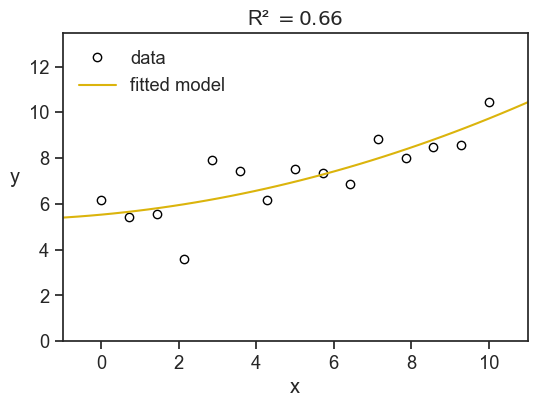

In [171]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, "o", mfc="None", mec="black", label="data")
x_line = np.linspace(x.min() - 10, x.max() + 10, 100)
ax.plot(x_line, f_predicted(x_line), "-", color=gold, label="fitted model")
SS_residuals = np.sum((y - y_hat) ** 2)
SS_total = np.sum((y - y.mean()) ** 2)
R_squared = 1 - SS_residuals / SS_total
ax.set(xlabel="x",
       xlim=(x.min() - 1, x.max() + 1),
       ylim=(0, y.max() + 3),
       title=fr"R² $= {R_squared:.2f}$")
ax.legend(loc="upper left", frameon=False);
ax.set_ylabel("y", rotation=0, labelpad=10);

Here we have $R^2=0.66$, meaning that the model explains 66% of the variance in the observed values. The remaining 34% of the variance is due to other factors not captured by the model.

The sum of squares have a nice visual interpretation. In the figure below we show $SS_\text{Total}$ (the total sum of squares) litterally as the area of a bunch of pink squares. Each square's side has length $|y_i - \bar{y}|$. If we divide the total pink area by the number of observations minus one, we get the sample variance of the observed values.

The yellow squares represent $SS_\text{Error}$ (the sum of squares not explained by the model), where the length of each square's side is $|y_i - \hat{y}_i|$. If we divide the total yellow area by the number of observations minus one, we get the sample variance of the errors (residuals). 

Finally, the $R^2$ is simply one minus the ratio of the yellow area to the pink area.

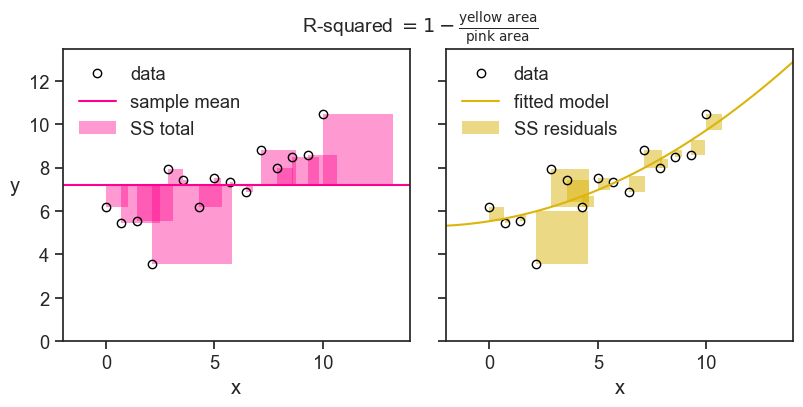

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True, subplot_kw={'aspect':'equal'})
fig.subplots_adjust(left=0.04, right=0.98, top=0.88, bottom=0.15,
                    hspace=0.05, wspace=0.04)
ax[0].plot(x, y, "o", mfc="None", mec="black", label="data")
ax[1].plot(x, y, "o", mfc="None", mec="black", label="data")

ax[0].axhline(y=y.mean(), color=pink, label="sample mean")
ax[1].plot(x_line, f_predicted(x_line), "-", color=gold, label="fitted model")

for ind in np.arange(len(x)):
    x0 = x[ind]
    y0 = y[ind]
    # print(x0,y0)
    v1 = y_hat[ind] - y0
    v2 = y.mean() - y0
    # add_rec(ax[1], (x0, y0), -v1, "blue")
    # add_rec(ax[0], (x0, y0), -v2, "red")
    ax[0].fill_between(x=[x0, x0 + np.abs(v2)],
                       y1=y0, y2=y0 + v2,
                       alpha=0.4, color=pink,
                       label="SS total" if ind == 0 else None,
                       linewidth=0)
    ax[1].fill_between(x=[x0, x0 + np.abs(v1)],
                       y1=y0, y2=y0 + v1,
                       alpha=0.5, color=gold,
                       label="SS residuals" if ind == 0 else None,
                       linewidth=0)


fig.suptitle(r"R-squared $= 1 - \frac{\text{yellow area}}{\text{pink area}}$", fontsize=14, y=0.98)

ax[0].set(xlabel="x",
       xlim=(x.min() - 2, x.max() + 4),
         ylim=(0, y.max() + 3),)
ax[1].set(xlabel="x",
       xlim=(x.min() - 2, x.max() + 4),
         ylim=(0, y.max() + 3),)
ax[0].legend(loc="upper left", frameon=False);
ax[1].legend(loc="upper left", frameon=False);
ax[0].set_ylabel("y", rotation=0, labelpad=10);

## negative R-squared?

Yes. Sometimes it can be negative. Let's see the formula:

$$
R^2 = 1 - \frac{SS_\text{Error}}{SS_\text{Total}} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

R-squared can be negative when the numerator (the sum of squared residuals) is greater than the denominator (the total sum of squares). Another way of saying this is: the model does a worse job of fitting the data than the mean of the observed data. I can imagine two scenarios where this can happen.

### the model doesn't have an intercept

Let's start with an absurd model:

$$
y = \beta_0
$$

This is to say, the model is just a horizontal line. In order to find the best fit, we need to find the optimal $\beta_0$. We can do that by minimizing the sum of squared residuals, $SS_\text{Error}$, with respect to $\beta_0$.

$$
\frac{\partial }{\partial \beta_0} SS_\text{Error} = \frac{\partial}{\partial \beta_0} \sum_{i=1}^n (y_i - \beta_0)^2 = 0
$$

then...

$$
-2\sum_{i=1}^n (y_i - \beta_0) = 0 \longrightarrow
\beta_0 = \frac{1}{n} \sum_{i=1}^n y_i = \bar{y}
$$

We found that the absurd model $y = \beta_0$ is optimized when $\beta_0$ is the mean of the observed data, $\bar{y}$. So let's call the absurd model now the "mean model".

We use the sum of squares of this mean model as a **benchmark**. Of course, this is what we called $SS_\text{Total}$, the total sum of squares. When we say that a given model has R-squared greater than zero, we are saying that the model does a better job of fitting the data than the mean model. If R-squared is zero, it does equally well. If R-squared is negative, it does worse.

When we modeled the data as a parabola, we used the formula

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2.
$$

This model **has to be better** than the mean model, because the mean model is a special case of the parabola, where $\beta_1 = \beta_2 = 0$. Whatever nonzero values are assigned to $\beta_1$ and $\beta_2$ during the optimization procees, the $SS_\text{Error}$ becomes **necessarily smaller** than $SS_\text{Total}$.

This is true not only for the parabola, but for **any model that includes an intercept**. So, if we fit a model that has an intercept term, we are **guaranteed** to have $R^2 \geq 0$. If we fit a model without an intercept, we are not guaranteed to have $R^2 \geq 0$. See below what happens when we fit a three different polynomials without an intercept to the data.

In [119]:
# use sm to create matrix design for a parabola
X1 = np.column_stack((x,))
X2 = np.column_stack((x, x**2))
X3 = np.column_stack((x, x**2, x**3))
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
y_hat1 = model1.predict(X1)
y_hat2 = model2.predict(X2)
y_hat3 = model3.predict(X3)
p1 = np.append(0, model1.params)
p2 = np.append(0, model2.params)
p3 = np.append(0, model3.params)
f_predicted1 = np.poly1d(p1[::-1])
f_predicted2 = np.poly1d(p2[::-1])
f_predicted3 = np.poly1d(p3[::-1])

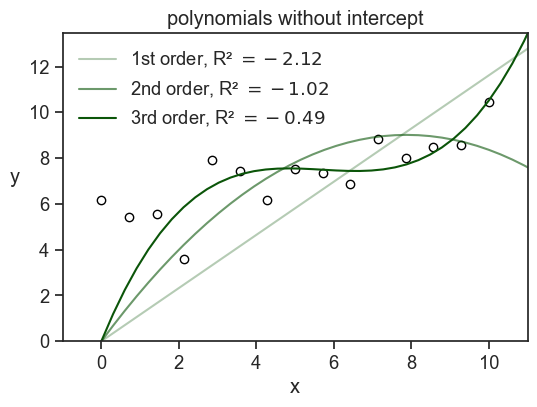

In [129]:
SS_total = np.sum((y - y.mean())**2)
SS_residuals1 = np.sum((y - y_hat1)**2)
SS_residuals2 = np.sum((y - y_hat2)**2)
SS_residuals3 = np.sum((y - y_hat3)**2)
R_squared1 = 1 - SS_residuals1 / SS_total
R_squared2 = 1 - SS_residuals2 / SS_total
R_squared3 = 1 - SS_residuals3 / SS_total

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, "o", mfc="None", mec="black")
x_line = np.linspace(x.min() - 10, x.max() + 10, 100)
ax.plot(x_line, f_predicted1(x_line), "-", color=green, label=fr"1st order, R² $= {R_squared1:.2f}$", alpha=0.3)
ax.plot(x_line, f_predicted2(x_line), "-", color=green, label=fr"2nd order, R² $= {R_squared2:.2f}$", alpha=0.6)
ax.plot(x_line, f_predicted3(x_line), "-", color=green, label=fr"3rd order, R² $= {R_squared3:.2f}$")
ax.set(xlabel="x",
       xlim=(x.min() - 1, x.max() + 1),
       ylim=(0, y.max() + 3),
       title=fr"polynomials without intercept")
ax.legend(loc="upper left", frameon=False);
ax.set_ylabel("y", rotation=0, labelpad=10);

Note that if I had used `np.polyfit` to fit the data, I would have gotten a model with an intercept. In order to get a model without an intercept, I had to design myself the design matrix and use `statmodels.OLS`.

There's another option for how to get negative R-squared.

### the model is fitted to a different dataset

This is quite common when we train a model on a training set, and then evaluate it on a test set. If the model is overfitted to the training data, it may perform very poorly on the test data, resulting in a negative R-squared value when evaluated on the test set. It also may be that we have a small test set, and by chance the model performs very poorly on it, even if it is not overfitted. In any case, a negative R-squared value in this context indicates that the model is not generalizing well to new data. See an example below.

In [172]:
for seed in np.arange(10):
    rng = np.random.default_rng(seed=seed)
    N = 30
    x_sample = rng.uniform(0, 10, N)
    noise = rng.normal(scale=1, size=N)
    y_sample = foo(x_sample) + rng.normal(scale=1, size=N)
    idx = int(0.67 * N)
    x_train = x_sample[:idx]
    y_train = y_sample[:idx]
    x_test = x_sample[idx:]
    y_test = y_sample[idx:]

    coefficients = np.polyfit(x_train, y_train, deg=2)
    fitted_model = np.poly1d(coefficients)
    y_predicted_train = fitted_model(x_train)
    y_predicted_test = fitted_model(x_test)

    SS_total_train = np.sum((y_train - y_train.mean())**2)
    SS_total_test = np.sum((y_test - y_test.mean())**2)
    SS_residuals_train = np.sum((y_train - y_predicted_train)**2)
    SS_residuals_test = np.sum((y_test - y_predicted_test)**2)
    R_squared_train = 1 - SS_residuals_train / SS_total_train
    R_squared_test = 1 - SS_residuals_test / SS_total_test
    print(f"seed: {seed}, R² train: {R_squared_train:.2f}, R² test: {R_squared_test:.2f}")

seed: 0, R² train: 0.54, R² test: 0.53
seed: 1, R² train: 0.73, R² test: 0.73
seed: 2, R² train: 0.61, R² test: 0.58
seed: 3, R² train: 0.43, R² test: -0.62
seed: 4, R² train: 0.69, R² test: 0.54
seed: 5, R² train: 0.75, R² test: 0.79
seed: 6, R² train: 0.69, R² test: 0.63
seed: 7, R² train: 0.75, R² test: 0.69
seed: 8, R² train: 0.53, R² test: 0.64
seed: 9, R² train: 0.65, R² test: 0.62


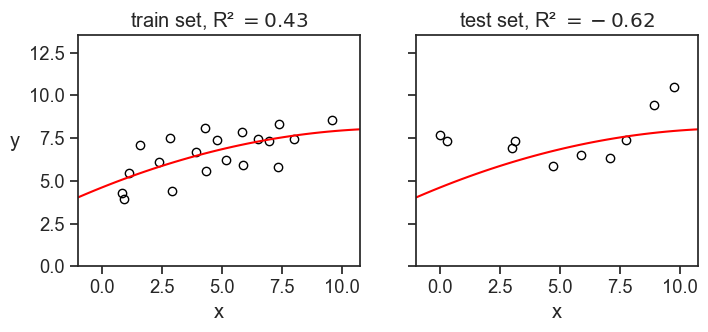

In [170]:
rng = np.random.default_rng(seed=3)
N = 30
x_sample = rng.uniform(0, 10, N)
noise = rng.normal(scale=1, size=N)
y_sample = foo(x_sample) + rng.normal(scale=1, size=N)
idx = int(0.67 * N)
x_train = x_sample[:idx]
y_train = y_sample[:idx]
x_test = x_sample[idx:]
y_test = y_sample[idx:]

coefficients = np.polyfit(x_train, y_train, deg=2)
fitted_model = np.poly1d(coefficients)
y_predicted_train = fitted_model(x_train)
y_predicted_test = fitted_model(x_test)

SS_total_train = np.sum((y_train - y_train.mean())**2)
SS_total_test = np.sum((y_test - y_test.mean())**2)
SS_residuals_train = np.sum((y_train - y_predicted_train)**2)
SS_residuals_test = np.sum((y_test - y_predicted_test)**2)
R_squared_train = 1 - SS_residuals_train / SS_total_train
R_squared_test = 1 - SS_residuals_test / SS_total_test

fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True, sharex=True)
ax[0].plot(x_train, y_train, "o", mfc="None", mec="black")
ax[0].plot(x_line, fitted_model(x_line), color="red")

ax[1].plot(x_test, y_test, "o", mfc="None", mec="black")
ax[1].plot(x_line, fitted_model(x_line), color="red")

ax[0].set(xlabel="x",
       xlim=(x_sample.min() - 1, x_sample.max() + 1),
       ylim=(0, y_sample.max() + 3),
       title=fr"train set, R² $= {R_squared_train:.2f}$")
ax[0].set_ylabel("y", rotation=0, labelpad=10)
ax[1].set(xlabel="x",
       xlim=(x_sample.min() - 1, x_sample.max() + 1),
       ylim=(0, y_sample.max() + 3),
       title=fr"test set, R² $= {R_squared_test:.2f}$");

In the example above, we divided the dataset of 30 points into 20 training points and 10 test points. We fitted a parabola to the training data, and then evaluated the R-squared on both the training and test data. I had to play a little bit with the random seed to get a negative R-squared on the test set, but it is not that hard to get it.